* 모델링 가장 적합한 확률 분포는 정규분포 임
    - 실제로 많은 피처가 특정 방향으로 치우쳐 있음
    - 한 쪽으로 치우친 피처에서 반대 방향의 값 (꼬리부분) - 이상치처럼 작용하므로 제거해야 함

### 탐색방법 : 왜도(skewness)

- 변수 치우침을 확인하기 가장 적절한 척도로는 왜도가 있음
- 왜도
    - 분포의 비대칭도를 나타내는 통계량
    - 왜도의 절대값이 <b> 1.5이상 </b> 이면 치우쳤다고 판단



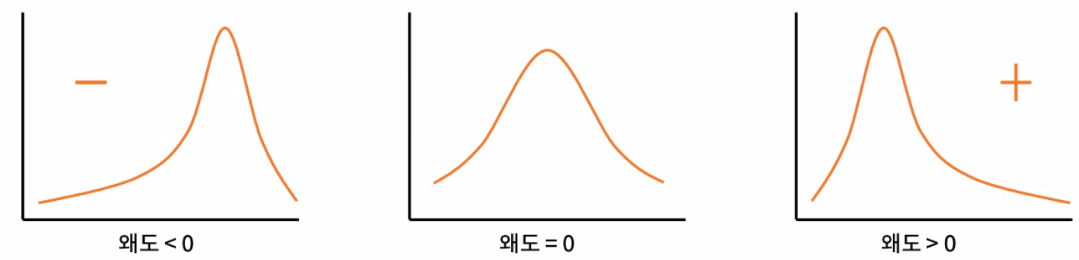

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
df = pd.read_csv('./data/sonar.csv') 
df.head() # 헤더가 존재하지 않아서 발생한 문제

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
df = pd.read_csv('./data/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
columns = ['band' + str(i) for i in range(1,61)]
columns.append('Y')
columns

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'Y']

In [5]:
df.columns = columns

In [6]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band52,band53,band54,band55,band56,band57,band58,band59,band60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [8]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, random_state=4)

In [9]:
# 왜도값 확인
Train_X.skew()

band1     2.122757
band2     2.206600
band3     2.980038
band4     3.765729
band5     2.316077
band6     1.319739
band7     0.995473
band8     1.391214
band9     1.659002
band10    1.421497
band11    1.115515
band12    0.647377
band13    0.753832
band14    1.131916
band15    0.887139
band16    0.671871
band17    0.677022
band18    0.636263
band19    0.366953
band20    0.012580
band21   -0.160018
band22   -0.421629
band23   -0.613929
band24   -0.651260
band25   -0.753808
band26   -0.604019
band27   -0.634036
band28   -0.684365
band29   -0.539911
band30   -0.188124
band31    0.208961
band32    0.252053
band33    0.360365
band34    0.509935
band35    0.543931
band36    0.581213
band37    0.660349
band38    0.929952
band39    0.897142
band40    0.909556
band41    0.874074
band42    0.866778
band43    0.921569
band44    1.295647
band45    1.274154
band46    1.611226
band47    1.794758
band48    1.201152
band49    1.274165
band50    1.764850
band51    2.907184
band52    2.189543
band53    1.

In [10]:
df['band4']

0      0.0207
1      0.0689
2      0.1083
3      0.0205
4      0.0394
        ...  
203    0.0177
204    0.0564
205    0.0292
206    0.0608
207    0.0272
Name: band4, Length: 208, dtype: float64

<AxesSubplot:>

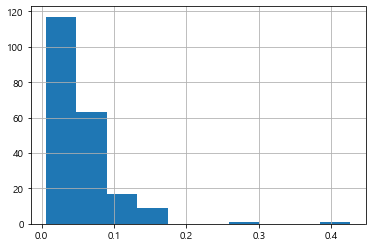

In [11]:
%matplotlib inline

df['band4'].hist()

### 치우침 제거
- np.log10() 함수


<AxesSubplot:>

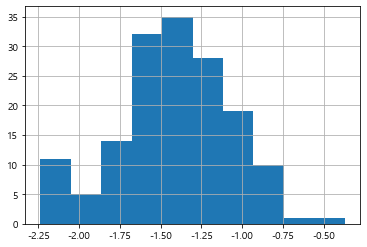

In [12]:
np.log10(Train_X['band4']).hist()

In [13]:
# 왜도의 절대값이 1.5 이상인 컬럼만 차기
bias_val = Train_X.columns[Train_X.skew().abs() > 1.5]
bias_val

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band9', 'band46',
       'band47', 'band50', 'band51', 'band52', 'band55', 'band56', 'band57',
       'band58', 'band59', 'band60'],
      dtype='object')

In [15]:
Train_X[bias_val] = np.log10(Train_X[bias_val])

In [16]:
Train_X.columns[Train_X.skew().abs() > 1.5]


Index([], dtype='object')